In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import rasterio
import glob
import os
from IPython.display import display
import ipywidgets as widgets
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout
from ipywidgets import HBox, VBox
from ipywidgets import Button, Output
from ipywidgets import FloatSlider, IntSlider, FloatRangeSlider
from ipywidgets import HTML
from ipywidgets import Label
from pathlib import Path



In [32]:
# Change to match your data folder layout
search_base = "/home/ubuntu/work/slc_test_subset/merged/interferograms"

# Update this for different products: 'int' = interferogram, 'cor' = coherence
product_type = "int"  # Change to 'cor' for coherence plots
files = sorted(glob.glob(f"{search_base}/*/filt_fine_*.{product_type}.vrt"))


#files = sorted(glob.glob("/home/ubuntu/work/slc_test_subset/interferograms/*/IW3/fine_*.int.vrt"))


print(f"Found {len(files)} files")
for f in files:
    print(f)

Found 0 files


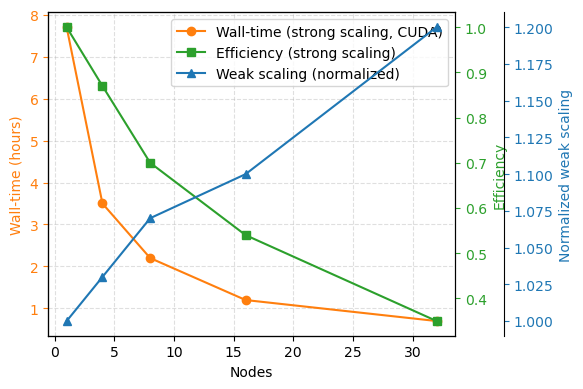

In [2]:
import matplotlib.pyplot as plt

# Your data (fill in with your real values)
nodes        = [1, 4, 8, 16, 32]
wall_time    = [7.7, 3.5, 2.2, 1.2, 0.7]      # strong scaling wall-time (hours)
eff_strong   = [1.0, 0.87, 0.70, 0.54, 0.35]  # strong scaling efficiency
weak_norm    = [1.00, 1.03, 1.07, 1.10, 1.20] # weak scaling (normalized)

# Colors
c1 = 'tab:orange'
c2 = 'tab:green'
c3 = 'tab:blue'

fig, ax1 = plt.subplots(figsize=(6, 4))

# --- Left axis: wall-time ---
ln1 = ax1.plot(nodes, wall_time, '-o', color=c1,
               label='Wall-time (strong scaling, CUDA)')
ax1.set_xlabel('Nodes')
ax1.set_ylabel('Wall-time (hours)', color=c1)
ax1.tick_params(axis='y', colors=c1)
ax1.grid(True, linestyle='--', alpha=0.4)

# --- Right axis 1: efficiency ---
ax2 = ax1.twinx()
ln2 = ax2.plot(nodes, eff_strong, '-s', color=c2,
               label='Efficiency (strong scaling)')
ax2.set_ylabel('Efficiency', color=c2)
ax2.tick_params(axis='y', colors=c2)

# --- Right axis 2 (shifted): weak scaling ---
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.12))  # shift the 3rd axis a bit right
ln3 = ax3.plot(nodes, weak_norm, '-^', color=c3,
               label='Weak scaling (normalized)')
ax3.set_ylabel('Normalized weak scaling', color=c3)
ax3.tick_params(axis='y', colors=c3)

# --- Combined legend ---
lines = ln1 + ln2 + ln3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='best')

plt.tight_layout()
plt.show()


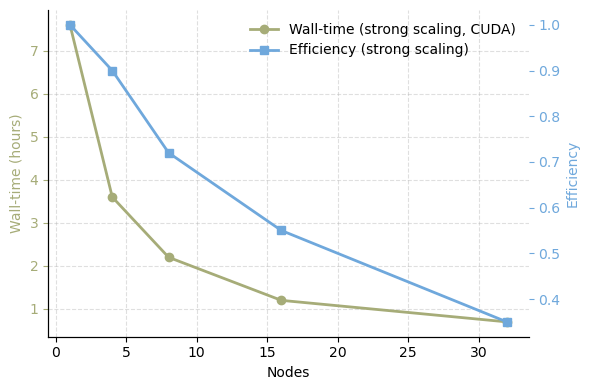

In [4]:
import matplotlib.pyplot as plt

# Data
nodes      = [1, 4, 8, 16, 32]
wall_time  = [7.6, 3.6, 2.2, 1.2, 0.7]       # hours, strong scaling (CUDA)
eff_strong = [1.0, 0.90, 0.72, 0.55, 0.35]   # efficiency
weak_norm  = [1.00, 1.03, 1.07, 1.10, 1.20]  # normalized weak scaling

# Colors: match your example + light blue for weak scaling
c_wall = "#a6ac78"
c_eff  = '#6fa8dc'
c_weak = '#6fa8dc'   # lighter blue

fig, ax1 = plt.subplots(figsize=(6, 4))

# --- Left axis: wall-time (orange) ---
ln1 = ax1.plot(nodes, wall_time, '-o', color=c_wall,
               label='Wall-time (strong scaling, CUDA)', linewidth=2, markersize=6)
ax1.set_xlabel('Nodes')
ax1.set_ylabel('Wall-time (hours)', color=c_wall)
ax1.tick_params(axis='y', colors=c_wall)
ax1.grid(True, linestyle='--', alpha=0.4)

# --- Right axis (1): efficiency (green) ---
ax2 = ax1.twinx()
ln2 = ax2.plot(nodes, eff_strong, '-s', color=c_eff,
               label='Efficiency (strong scaling)', linewidth=2, markersize=6)
ax2.set_ylabel('Efficiency', color=c_eff)
ax2.tick_params(axis='y', colors=c_eff)

# # --- Right axis (2, shifted): weak scaling (light blue) ---
# ax3 = ax1.twinx()
# ax3.spines['right'].set_position(('axes', 1.10))  # small shift to the right
# ln3 = ax3.plot(nodes, weak_norm, '-^', color=c_weak,
#                label='Weak scaling (normalized)', linewidth=2, markersize=6)
# ax3.set_ylabel('Normalized weak scaling', color=c_weak)
# ax3.tick_params(axis='y', colors=c_weak) 

# --- Remove border (top/right spines) ---
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
# keep only the *outermost* right spine (from ax3)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)

# --- Legend without frame ---
lines = ln1 + ln2 # + ln3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right', frameon=False)

plt.tight_layout()
plt.show()




In [10]:
# Index of file to plot (0 = first one)
file_idx = 0

if files:
    file_path = files[file_idx]
    print(f"Inspecting: {file_path}")

    with rasterio.open(file_path) as src:
        phase = np.angle(src.read(1))
        plt.figure(figsize=(10, 6))
        im = plt.imshow(phase, cmap='hsv', aspect='auto')  # Use hsv for phase and auto aspect
        plt.colorbar(im, label='Phase (radians)')
        plt.title("Wrapped Interferogram Phase")
        plt.xlabel("Range (pixels)")
        plt.ylabel("Azimuth (pixels)")
        plt.show()




In [11]:
file_idx = 1

if files:
    file_path = files[file_idx]
    print(f"Inspecting: {file_path}")
    with rasterio.open(file_path) as src:
        data = src.read(1)
        phase = np.angle(data)
        amp = np.abs(data)

        # Mask out low-amplitude (noisy) regions
        mask = amp > np.percentile(amp, 10)  # Keep top 60% pixels by amplitude

        plt.figure(figsize=(10, 6))
        plt.imshow(np.ma.array(phase, mask=~mask), cmap='hsv', aspect='auto')
        plt.colorbar(label='Phase (radians)')
        plt.title("Wrapped Interferogram Phase (Masked)")
        plt.xlabel("Range (pixels)")
        plt.ylabel("Azimuth (pixels)")
        plt.show()


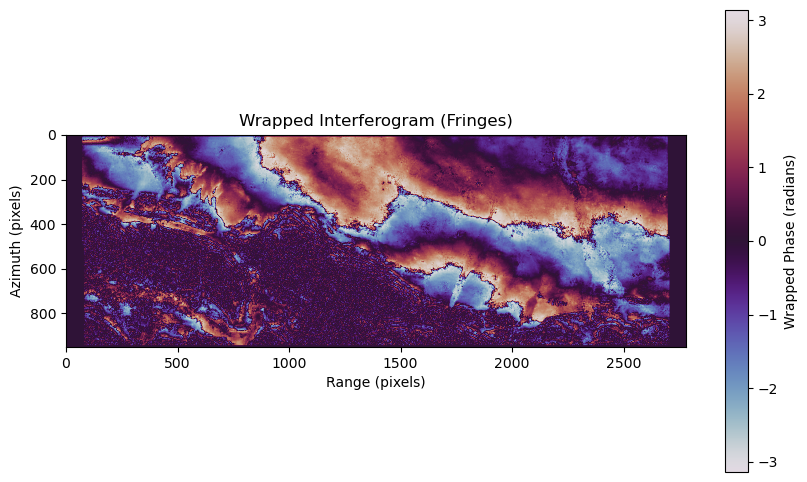

In [12]:

wrapped_path = "/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.int"

with rasterio.open(wrapped_path) as src:
    wrapped = src.read(1)

phase = np.angle(wrapped)

plt.figure(figsize=(10, 6))
plt.imshow(phase, cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.colorbar(label="Wrapped Phase (radians)")
plt.title("Wrapped Interferogram (Fringes)")
plt.xlabel("Range (pixels)")
plt.ylabel("Azimuth (pixels)")
plt.show()


In [13]:


# Constants
S1_WAVELENGTH = 0.05546576  # Sentinel-1 wavelength in meters

def load_raster(path):
    """Load raster and return data and metadata."""
    with rasterio.open(path) as src:
        data = src.read(1)
        meta = src.meta
    return data, meta

def plot_wrapped_phase(file_path, clip=True):
    data, _ = load_raster(file_path)
    phase = np.angle(data)
    if clip:
        phase = np.clip(phase, -np.pi, np.pi)

    plt.figure(figsize=(10, 6))
    plt.imshow(phase, cmap='jet', aspect='auto')
    plt.colorbar(label="Phase (radians)")
    plt.title("Wrapped Interferogram Phase")
    plt.xlabel("Range (pixels)")
    plt.ylabel("Azimuth (pixels)")
    plt.show()



def plot_displacement(file_path, coherence_path=None):
    with rasterio.open(file_path) as src:
        unw = src.read(1)

    if coherence_path:
        with rasterio.open(coherence_path) as coh_src:
            coh = coh_src.read(1)
        unw = np.where(coh > 0.3, unw, np.nan)

    # Convert unwrapped phase to displacement (LOS in meters)
    S1_WAVELENGTH = 0.05546576  # Sentinel-1 C-band wavelength in meters
    displacement = (S1_WAVELENGTH * unw) / (4 * np.pi)

    # Use percentile stretch for visualization
    vmin, vmax = np.nanpercentile(displacement, [2, 98])

    plt.figure(figsize=(10, 6))
    im = plt.imshow(displacement, cmap='seismic', vmin=vmin, vmax=vmax, aspect='auto')
    plt.colorbar(im, label="LOS Displacement (m)")
    plt.title("Line-of-Sight Displacement")
    plt.xlabel("Range (pixels)")
    plt.ylabel("Azimuth (pixels)")
    plt.tight_layout()
    plt.show()

def plot_unwrapped_phase(file_path, coherence_path=None):
    """Plot unwrapped interferogram phase, optionally masked by coherence.

    Args:
        file_path (str): Path to .unw file (assumes a corresponding .vrt exists).
        coherence_path (str, optional): Path to .cor file. Defaults to None.
        clip_percentile (tuple): Percentiles for value clipping. Defaults to (2, 98).
        mask_threshold (float): Threshold for masking coherence. Defaults to 0.3.
    """
    with rasterio.open(file_path) as src:
        data = src.read(1)

    if coherence_path:
        with rasterio.open(coherence_path) as coh_src:
            coh = coh_src.read(1)
        data = np.where(coh > .3, data, np.nan)
    # data, _ = load_raster(file_path)

    # if coherence_path:
    #     coh, _ = load_raster(coherence_path)
    #     data = np.where(coh > 0.3, data, np.nan)

    # Use percentiles to determine dynamic vmin/vmax
    vmin, vmax = np.percentile(data, [2,98])

    plt.figure(figsize=(10, 6))
    plt.imshow(data, cmap='jet', vmin=vmin, vmax=vmax, aspect='auto')
    plt.colorbar(label="Unwrapped Phase (radians)")
    plt.title("Unwrapped Interferogram")
    plt.xlabel("Range (pixels)")
    plt.ylabel("Azimuth (pixels)")
    plt.tight_layout()
    plt.show()

   


def plot_coherence(coh_file):
    with rasterio.open(coh_file) as src:
        coh_data = src.read(1)

    print(f"Coherence stats: min = {coh_data.min():.2f}, max = {coh_data.max():.2f}")
    
    plt.figure(figsize=(10, 6))
    plt.imshow(coh_data, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar(label='Coherence')
    plt.title("Coherence Map")
    plt.xlabel("Range (pixels)")
    plt.ylabel("Azimuth (pixels)")
    plt.tight_layout()
    plt.show()




def plot_conncomp(conncomp_file):
    with rasterio.open(conncomp_file) as src:
        conncomp_data = src.read(1)

    print(f"Connected Components: min = {conncomp_data.min()}, max = {conncomp_data.max()}")
    
    plt.figure(figsize=(10, 6))
    plt.imshow(conncomp_data, cmap='tab20')
    plt.colorbar(label='Component ID')
    plt.title("Connected Components")
    plt.xlabel("Range (pixels)")
    plt.ylabel("Azimuth (pixels)")
    plt.tight_layout()
    plt.show()



In [14]:
home_path = Path("/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/")
wrapped_file = next(home_path.glob("*.int"), None)
unwrapped_file = next(home_path.glob("*.unw"), None)
coherence_file = next(home_path.glob("*.cor"), None)
print(f"wrapped file path: {wrapped_file}")
print(f"Unwrapped file path: {unwrapped_file}")
print(f"Coherence file path: {coherence_file}")

wrapped file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.int
Unwrapped file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw
Coherence file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.cor


Unwrapped phase stats: min = 0.00, max = 67314096.00


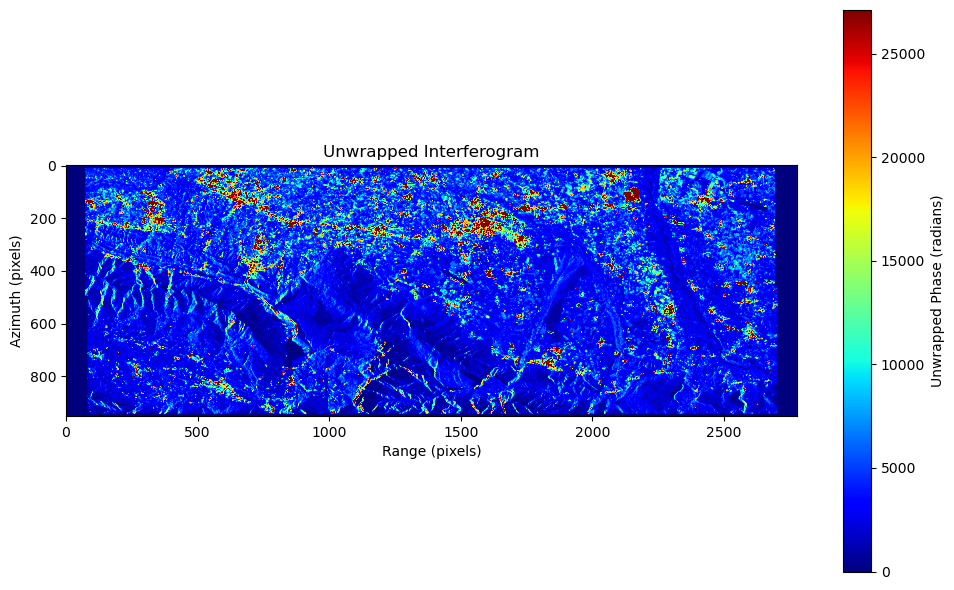

In [15]:

unwrapped_file = "/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw"

# Open the file using rasterio (it automatically reads dimensions via .vrt if present)
with rasterio.open(unwrapped_file) as src:
    unw_data = src.read(1)

# Print stats
print(f"Unwrapped phase stats: min = {unw_data.min():.2f}, max = {unw_data.max():.2f}")

# Optional: clip for better visibility (exclude extreme outliers)
vmin, vmax = np.percentile(unw_data, [2, 98])

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(unw_data, cmap='jet', vmin=vmin, vmax=vmax)
plt.colorbar(label='Unwrapped Phase (radians)')
plt.title("Unwrapped Interferogram")
plt.xlabel("Range (pixels)")
plt.ylabel("Azimuth (pixels)")
plt.tight_layout()
plt.show()


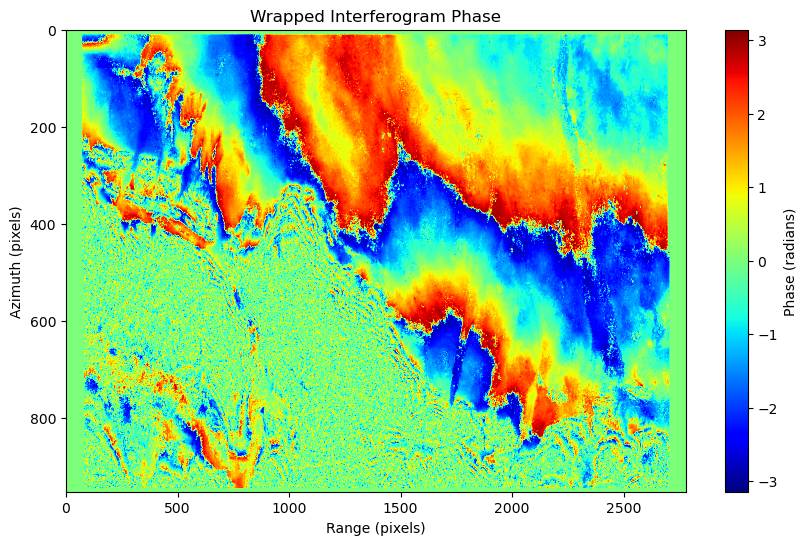

In [16]:
if wrapped_file:
    plot_wrapped_phase(str(wrapped_file))
else:
    print("Wrapped interferogram not found.")


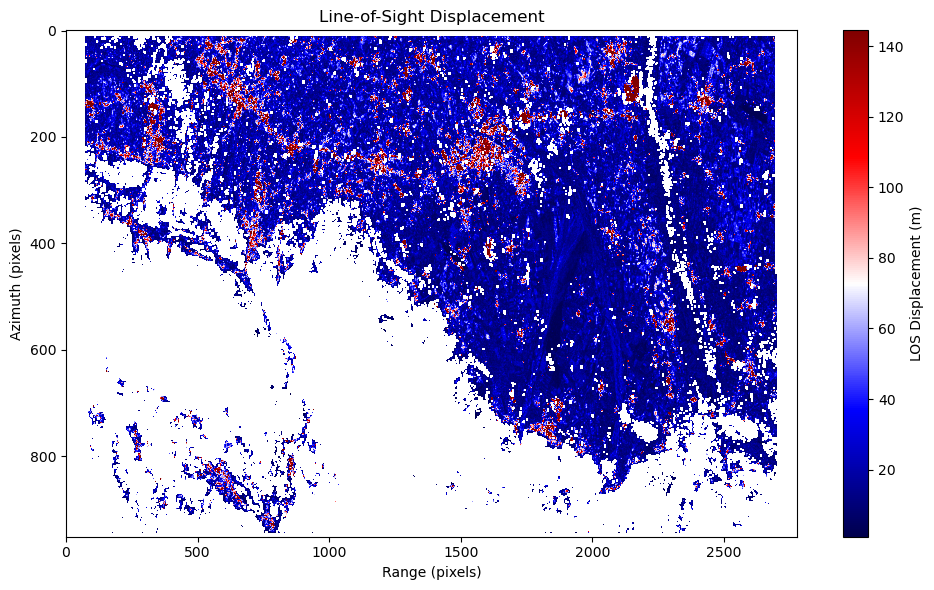

In [17]:
plot_displacement(unwrapped_file, coherence_file)



Coherence stats: min = 0.00, max = 1.00


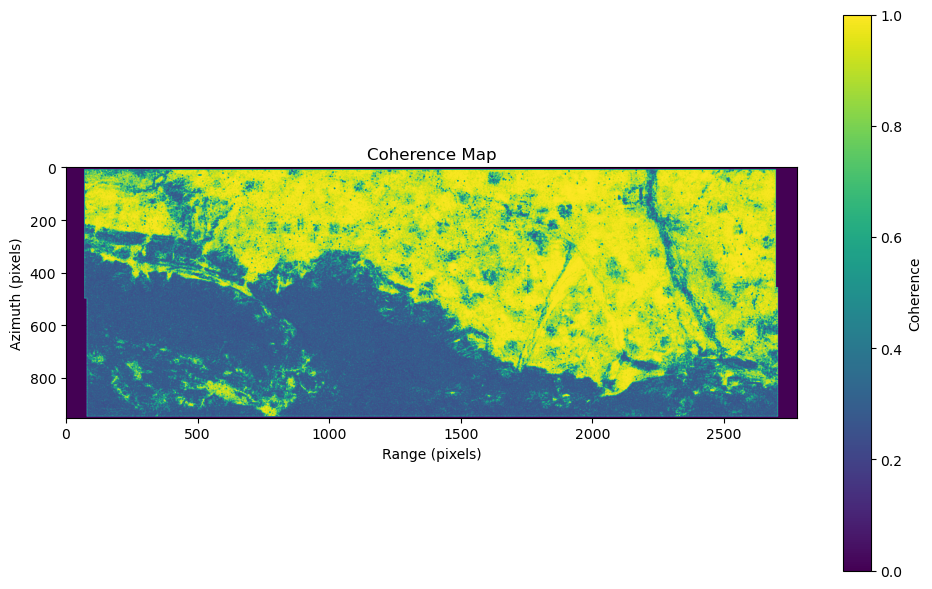

In [18]:

plot_coherence(coherence_file)

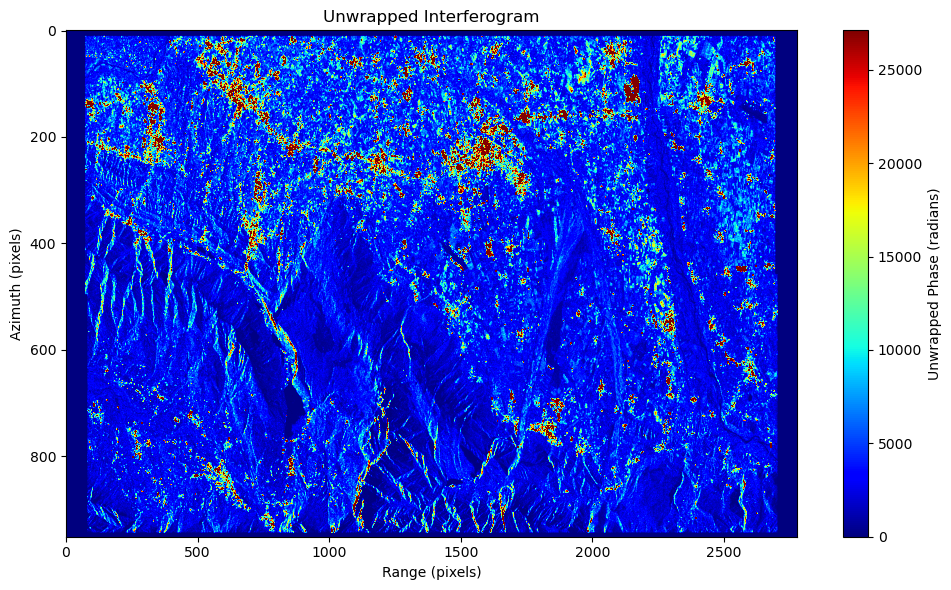

In [19]:

if unwrapped_file:
    plot_unwrapped_phase(unwrapped_file)
else:
    print("Unwrapped interferogram not found.")


unwrapped file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw
coherence file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.cor
conncomp file path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw.conncomp
Connected Components: min = 0, max = 20


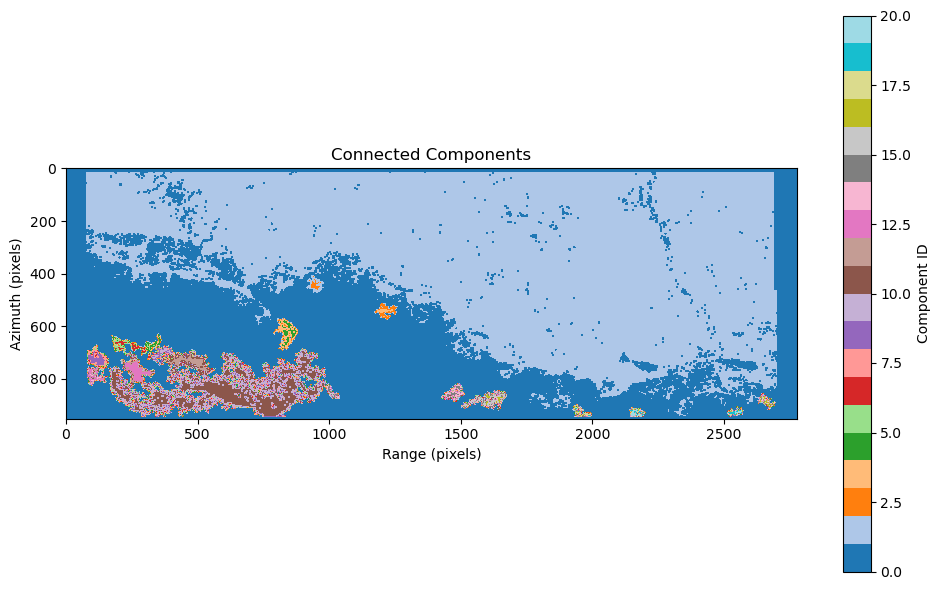

In [20]:
home_path = Path("/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/")
wrapped_file = next(home_path.glob("*.int"), None)
unwrapped_file = next(home_path.glob("*.unw"), None)
coherence_file = next(home_path.glob("*.cor"), None)
conncomp_file = next(home_path.glob("*.conncomp"), None)
print(f"unwrapped file path: {unwrapped_file}")
print(f"coherence file path: {coherence_file}")
print(f"conncomp file path: {conncomp_file}")
if conncomp_file:
    plot_conncomp(conncomp_file)
else:
    print("Connected components file not found.")
    

In [21]:
file_path = unwrapped_file
with rasterio.open(file_path) as src:
        data = src.read(1)
print(type(data))
print(data.shape)
print(data.dtype)
print(data.min())
print(data.max())
print(data.mean())
print(data.std())
print(data[0:10, 0:10])
print(data[0:10, 0:10].min())
print(data[0:10, 0:10].max())
print(data[0:10, 0:10].mean())
print(data[0:10, 0:10].std())
print(data[0:10, 0:10].flatten())
print(data[0:10, 0:10].flatten().min())
print(data[0:10, 0:10].flatten().max())

<class 'numpy.ndarray'>
(952, 2779)
float32
0.0
67314100.0
6007.835
110396.664
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.0
0.0
0.0
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0
0.0


File path: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw
Number of bands: 2
Width, Height: 2779 952
CRS (Coordinate Reference System): EPSG:4326
Transform (georeferencing): | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Data type: float32
Bounds: BoundingBox(left=0.0, bottom=952.0, right=2779.0, top=0.0)
Driver: ISCE
Band 1 description: None
Band 1 stats: dtype=float32
Band 2 description: None
Band 2 stats: dtype=float32


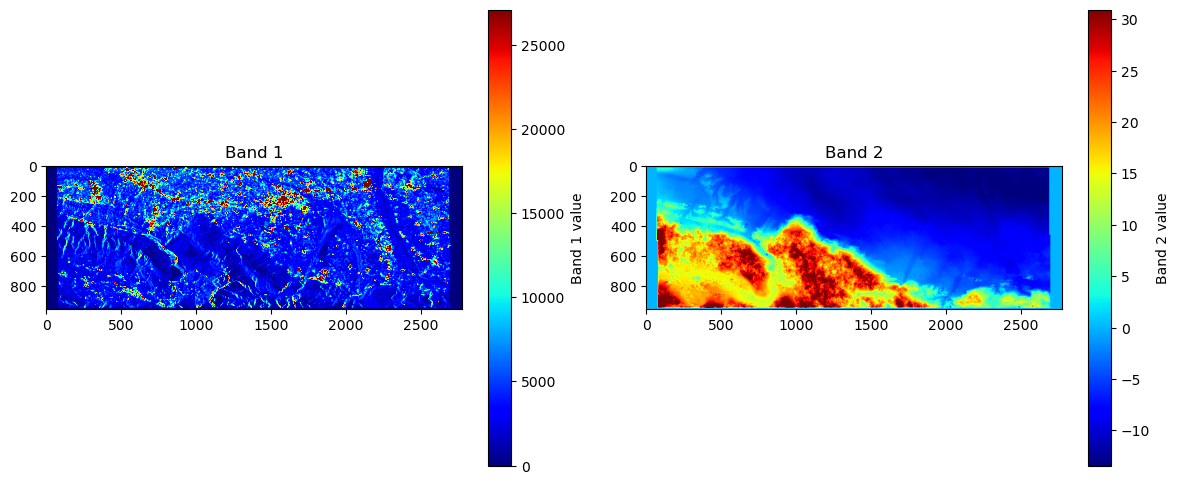

In [22]:
file_path = unwrapped_file
with rasterio.open(file_path) as src:
    print("File path:", src.name)
    print("Number of bands:", src.count)
    print("Width, Height:", src.width, src.height)
    print("CRS (Coordinate Reference System):", src.crs)
    print("Transform (georeferencing):", src.transform)
    print("Data type:", src.dtypes[0])
    print("Bounds:", src.bounds)
    print("Driver:", src.driver)
    for i in src.indexes:
        print(f"Band {i} description: {src.descriptions[i-1]}")
        print(f"Band {i} stats: dtype={src.dtypes[i-1]}")

    fig, axes = plt.subplots(1, src.count, figsize=(6 * src.count, 6))
    
    for i in range(1, src.count + 1):  # rasterio bands start at 1
        band = src.read(i)
        vmin, vmax = np.percentile(band[~np.isnan(band)], [2, 98])
        
        ax = axes[i - 1] if src.count > 1 else axes
        im = ax.imshow(band, cmap='jet', vmin=vmin, vmax=vmax)
        ax.set_title(f"Band {i}")
        fig.colorbar(im, ax=ax, shrink=0.8, label=f"Band {i} value")
    
    plt.tight_layout()
    plt.show()

In [23]:
with rasterio.open(unwrapped_file) as src:
    print("🔍 Raster file attributes:")
    for attr in dir(src):
        if not attr.startswith("_"):
            try:
                value = getattr(src, attr)
                if callable(value):
                    continue  # Skip methods
                print(f"{attr}: {value}")
            except Exception as e:
                print(f"{attr}: <error reading>")


🔍 Raster file attributes:
block_shapes: [(1, 2779), (1, 2779)]
bounds: BoundingBox(left=0.0, bottom=952.0, right=2779.0, top=0.0)
closed: False
colorinterp: (<ColorInterp.undefined: 0>, <ColorInterp.undefined: 0>)
compression: None
count: 2
crs: EPSG:4326
descriptions: (None, None)
driver: ISCE
dtypes: ('float32', 'float32')
files: ['/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw', '/home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw.xml']
gcps: ([], None)
height: 952
indexes: (1, 2)
interleaving: None
is_tiled: False
mask_flag_enums: ([<MaskFlags.all_valid: 1>], [<MaskFlags.all_valid: 1>])
meta: {'driver': 'ISCE', 'dtype': 'float32', 'nodata': None, 'width': 2779, 'height': 952, 'count': 2, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
mode: r
name: /home/ubuntu/work/slc_test_subset/merged/interferograms/20180101_20180113/filt_fine.unw
nodata: None
nodatavals: (None, No

In [24]:
with rasterio.open(unwrapped_file) as src:
    unw_data = src.read(1)
print(f"Unwrapped phase min: {unw_data.min():.2f} rad")
print(f"Unwrapped phase max: {unw_data.max():.2f} rad")
print(f"Unwrapped phase mean: {np.nanmean(unw_data):.2f} rad")
S1_WAVELENGTH = 0.05546576

disp_mean = (S1_WAVELENGTH / (4 * np.pi)) * np.nanmean(unw_data)
print(f"Displacement mean: {disp_mean:.2f} m")
disp_min = (S1_WAVELENGTH / (4 * np.pi)) * unw_data.min()
disp_max = (S1_WAVELENGTH / (4 * np.pi)) * unw_data.max()
print(f"Displacement range: {disp_min:.2f} m to {disp_max:.2f} m")


Unwrapped phase min: 0.00 rad
Unwrapped phase max: 67314096.00 rad
Unwrapped phase mean: 6007.83 rad
Displacement mean: 26.52 m
Displacement range: 0.00 m to 297112.64 m


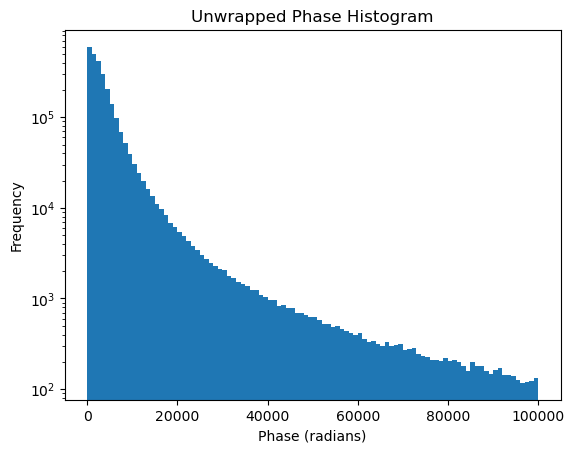

In [25]:
plt.hist(unw_data.flatten(), bins=100, range=(0, 1e5))
plt.title("Unwrapped Phase Histogram")
plt.xlabel("Phase (radians)")
plt.ylabel("Frequency")
plt.yscale("log")
plt.show()


In [26]:
print(f"Min: {np.nanmin(unw_data):.2f}, Max: {np.nanmax(unw_data):.2f}, Mean: {np.nanmean(unw_data):.2f}")


Min: 0.00, Max: 67314096.00, Mean: 6007.83


In [27]:
with rasterio.open(unwrapped_file) as src:
    print(src.dtypes)  # Check actual data type per band



('float32', 'float32')


In [28]:
with rasterio.open(unwrapped_file) as src:
    phase = src.read(1)
    conncomp = src.read(2)
print("Unwrapped phase preview:", phase[500:505, 1000:1010])
print("ConnComp preview:", conncomp[500:505, 1000:1010])


Unwrapped phase preview: [[ 1604.1035   3530.2034   2587.6565   5837.709    1789.6251   2290.8826
   2867.5754   8028.6953  11982.592    5346.4727 ]
 [ 2629.5723    567.39044  4886.86     3546.0764    163.6151   3056.8838
   4912.9287   6901.255    7122.583    7943.47   ]
 [ 4815.732     720.6495   3123.1375   2540.4329    931.7495   3509.0486
   3638.4346   3422.5508   1100.3812   2621.448  ]
 [ 2441.875    1066.0784    300.25296  3298.5977   9100.384    2156.4724
   6458.695    8886.8      3382.065    9887.853  ]
 [  322.57672   792.33856   552.2347   1635.5314   5843.7773   7863.3164
   4215.9546   4034.0566   4584.7935   2806.292  ]]
ConnComp preview: [[25.784887 22.56661  22.599817 26.346954 28.538143 27.807915 25.05509
  23.759056 21.804874 19.921297]
 [22.390034 20.762007 22.821253 24.773653 28.585768 26.889257 27.49786
  24.038994 23.563637 22.141973]
 [22.334145 20.47706  24.250263 26.732979 28.372877 26.220135 27.986847
  26.511671 24.475843 24.63828 ]
 [19.272276 22.636105 2

In [29]:
# Load LOS and height (elevation)
los, _ = load_raster("/home/ubuntu/work/slc_test_subset/merged/geom_reference/los.rdr")
hgt, _ = load_raster("/home/ubuntu/work/slc_test_subset/merged/geom_reference/hgt.rdr")

# Compute flat-earth phase in radians
S1_WAVELENGTH = 0.05546576  # meters
flat_phase = (4 * np.pi / S1_WAVELENGTH) * hgt * los

# Show stats
print(f"Flat-Earth Phase Range: min={np.nanmin(flat_phase):.2f}, max={np.nanmax(flat_phase):.2f}")


Flat-Earth Phase Range: min=-5194064.11, max=2409712.39


/home/ubuntu/anaconda3/envs/isce2/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [30]:
import xml.etree.ElementTree as ET
import pandas as pd

# Path to merged geom_reference folder
geom_dir = Path("/home/ubuntu/work/slc_test_subset/merged/geom_reference")

# Prepare summary list
summary = []

# Loop through files in directory
for file in geom_dir.iterdir():
    if file.suffix == ".rdr":
        try:
            with rasterio.open(file) as src:
                data = src.read(1, masked=True)
                summary.append({
                    "File": file.name,
                    "Type": "Raster",
                    "Shape": f"{data.shape[0]}x{data.shape[1]}",
                    "Min": float(data.min()),
                    "Max": float(data.max()),
                    "Mean": float(data.mean())
                })
        except Exception as e:
            summary.append({
                "File": file.name,
                "Type": "Raster (Unreadable)",
                "Shape": "N/A",
                "Min": "N/A",
                "Max": "N/A",
                "Mean": "N/A"
            })
    elif file.suffix == ".xml":
        try:
            tree = ET.parse(file)
            root = tree.getroot()
            summary.append({
                "File": file.name,
                "Type": "XML",
                "Shape": "N/A",
                "Min": "N/A",
                "Max": "N/A",
                "Mean": f"Root Tag: {root.tag}"
            })
        except Exception as e:
            summary.append({
                "File": file.name,
                "Type": "XML (Unreadable)",
                "Shape": "N/A",
                "Min": "N/A",
                "Max": "N/A",
                "Mean": "N/A"
            })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display


/home/ubuntu/anaconda3/envs/isce2/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
